In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Admission_Predict.csv")
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [4]:
dataset.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
dataset.drop('Serial No.', axis=1, inplace=True)
dataset

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [6]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Chance of Admit ', axis=1)
y = dataset['Chance of Admit ']

# Converting the 'Chance of Admit ' to 1 and 0

In [7]:
for i in range(0, len(y)):
    if(y[i]>=0.85):
        y[i]=1
    else:
        y[i] =0
y    

C:\Users\jayes\AppData\Local\Temp\ipykernel_20516\3686406319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=1
C:\Users\jayes\AppData\Local\Temp\ipykernel_20516\3686406319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] =0
C:\Users\jayes\AppData\Local\Temp\ipykernel_20516\3686406319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] =0
C:\Users\jayes\AppData\Local\Temp\ipykernel_20516\3686406319.py:5: SettingWit

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
395    0.0
396    0.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

In [8]:
y.value_counts()

Chance of Admit 
0.0    311
1.0     89
Name: count, dtype: int64

In [9]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(criterion='gini', splitter='best')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

len(X_train), len(X_test), len(y_train), len(y_test)


(300, 100, 300, 100)

In [10]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.7125, 0.9375, 'x[5] <= 9.165\ngini = 0.354\nsamples = 300\nvalue = [231, 69]'),
 Text(0.525, 0.8125, 'x[5] <= 9.055\ngini = 0.094\nsamples = 242\nvalue = [230, 12]'),
 Text(0.3, 0.6875, 'x[0] <= 330.0\ngini = 0.036\nsamples = 221\nvalue = [217, 4]'),
 Text(0.25, 0.5625, 'x[5] <= 8.92\ngini = 0.027\nsamples = 220\nvalue = [217, 3]'),
 Text(0.1, 0.4375, 'x[4] <= 4.75\ngini = 0.01\nsamples = 201\nvalue = [200, 1]'),
 Text(0.05, 0.3125, 'gini = 0.0\nsamples = 195\nvalue = [195, 0]'),
 Text(0.15, 0.3125, 'x[1] <= 109.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.1, 0.1875, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.2, 0.1875, 'x[0] <= 321.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.15, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.4375, 'x[5] <= 8.95\ngini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(0.35, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.45, 

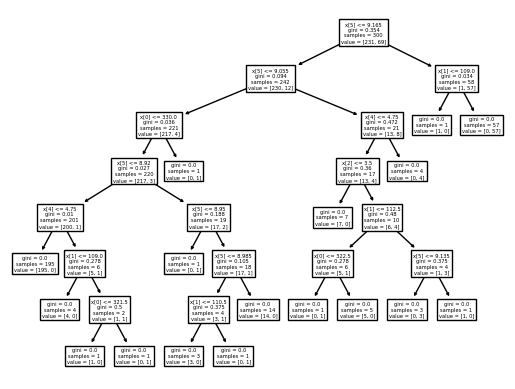

In [11]:
tree.plot_tree(tree_model)

In [12]:
y_preds = tree_model.predict(X_test)
y_preds

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
from sklearn.metrics import   accuracy_score, confusion_matrix


acc = accuracy_score(y_test, y_preds)
cm = confusion_matrix(y_test, y_preds)

print("ACC:", {acc})

ACC: {0.9}


In [14]:
print(cm)

[[76  4]
 [ 6 14]]


In [ ]:
features = []
for i in range(X_test.shape[1]):  # Get input for each feature
    value = float(input(f"Enter value for feature {i+1}: "))
    features.append(value)
user_data = np.array([features])

# Predict admission probability


In [19]:
admission_prob = tree_model.predict_proba(user_data)[:, 1]  # Probability of class 1 ("Yes")

# Classify based on threshold
threshold = 0.85
if admission_prob > threshold:
    admission_result = "Yes"
else:
    admission_result = "No"

print(f"Admission probability: {admission_prob[0]:.4f}")
print(f"Admission: {admission_result}")

Admission probability: 0.0000
Admission: No


C:\Users\jayes\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
